## AAG00

### Analisando o DataSet

Segundo o artigo consultado foram coletadas medidas de distância de 1 a 20 metros a cada metro usando o FTM (Fine Time Measurement) especificado na IEEE 802.11. 

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../DataSet/outdoor40.csv")
df.head()

,actualDist,rttRaw,estDistRaw,rttEst,estDistEst,meanRss
0,1,5,0.749481,0,0.0,-66.0
1,1,5,0.749481,0,0.0,-66.0
2,1,5,0.749481,0,0.0,-66.0
3,1,4,0.599585,0,0.0,-66.0
4,1,4,0.599585,0,0.0,-66.0


In [122]:
df.describe()

,actualDist,rttRaw,estDistRaw,rttEst,estDistEst,meanRss
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,10.372730,78.619943,11.784833,60.804715,9.114397,-80.112394
std,5.728561,41.412703,6.207608,37.910268,5.682606,6.587537
min,1.000000,3.000000,0.449689,0.000000,0.000000,-90.333333
25%,5.000000,43.000000,6.445538,28.000000,4.197094,-85.375000
50%,10.000000,79.000000,11.841802,59.000000,8.843878,-81.500000
75%,15.000000,114.000000,17.088170,90.000000,13.490661,-77.750000
max,20.000000,162.000000,24.283189,136.000000,20.385887,-57.000000


#### Descrição dos Campos

- **actualDist**: Distância real
- **rttRaw**: Tempo de viagem bruto (RTT)
- **estDistRaw**: Distância estimada usando o tempo bruto (RTT)
- **rttEst**: Tempo estimado pelo ESP32
- **estDistEst**: Distância estimada pelo ESP32
- **meanRss**: Média do valor de RSS (intensidade do sinal)

 #### Gráfico correlacionando distância real e intensidade do sinal

 Usado para avaliar a correlação entre as medidas

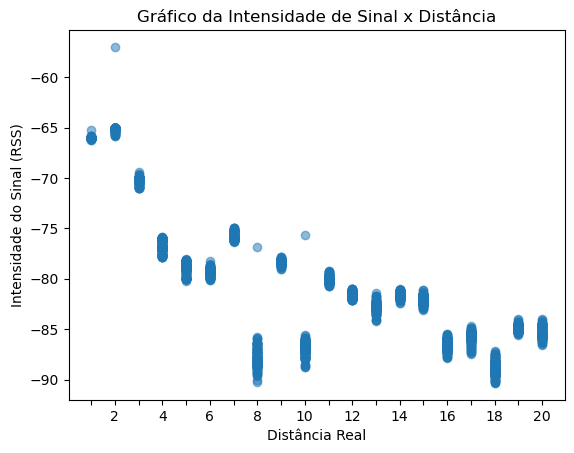

In [140]:
import matplotlib.pyplot as plt

max_dist = df['actualDist'].max()
min_dist = df['actualDist'].min()

plt.scatter(df['actualDist'], df['meanRss'], alpha=0.5)
plt.xlabel('Distância Real')
plt.ylabel('Intensidade do Sinal (RSS)')
plt.title('Gráfico da Intensidade de Sinal x Distância')

# Ajustar a escala do eixo x para ticks de 1 em 1 e rótulos de 2 em 2
ticks = range(int(min_dist), int(max_dist) + 1)
labels = [str(i) if i % 2 == 0 else '' for i in ticks]
plt.xticks(ticks, labels)

plt.show()

Fazendo o calculo da correlação entre as variáveis

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

In [124]:
df['actualDist'].corr(df['meanRss'])

-0.7998984140898491

Podemos notar que há correlação inversa entre elas.

 #### Gráfico das Distâncias Estimadas

 Usado para avaliar a precisão e acurácia das medidas estimadas pelos dois métodos.

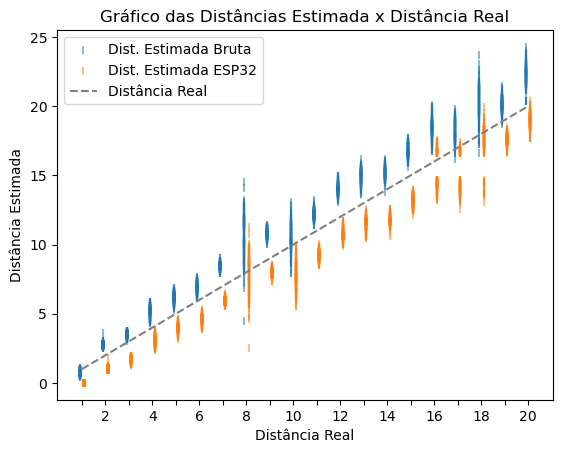

In [142]:
# Prompt: Preciso de um gráfico de pontos que mostre actualDist no eixo x e estDistRaw e estDistEst no eixo y

# Criar o gráfico de pontos
# plt.figure(figsize=(10, 6))
plt.scatter(df['actualDist'] - 0.1, df['estDistRaw'], label='Dist. Estimada Bruta', 
    alpha=0.5, marker='|')
plt.scatter(df['actualDist'] + 0.1, df['estDistEst'], label='Dist. Estimada ESP32', 
    alpha=0.5, marker='|')

# Linha representando a distância real
max_dist = df['actualDist'].max()
min_dist = df['actualDist'].min()
plt.plot([min_dist, max_dist], [min_dist, max_dist], linestyle='--', color='gray', label='Distância Real')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico das Distâncias Estimada x Distância Real')
plt.xlabel('Distância Real')
plt.ylabel('Distância Estimada')
plt.legend()

# Ajustar a escala do eixo x para ticks de 1 em 1 e rótulos de 2 em 2
ticks = range(int(min_dist), int(max_dist) + 1)
labels = [str(i) if i % 2 == 0 else '' for i in ticks]
plt.xticks(ticks, labels)

# Mostrar o gráfico
plt.show()

Podemos notar um offset nas duas estimativas, curiosamente uma deu sempre uma medida um pouco maior e a outra um pouco menor que a real

Agora vamos verificar se existem outras correlações.

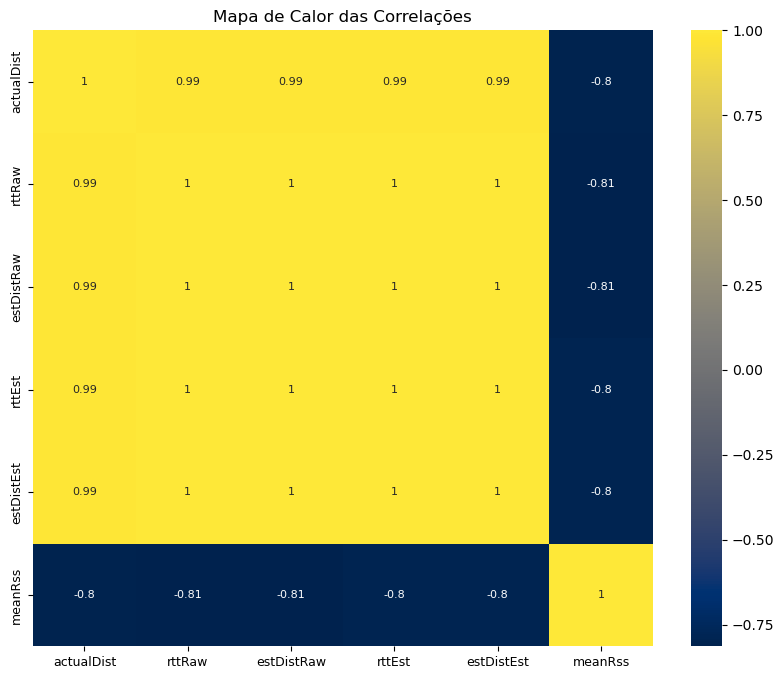

In [126]:
# mapa de calor da matriz de correlação dos dados numéricos
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='cividis', annot_kws={"size": 8})
plt.title("Mapa de Calor das Correlações")
plt.xticks(fontsize=9) 
plt.yticks(fontsize=9) 
plt.show()

Podemos observar que existe correlação muito forte entre as medidas de tempo (RTT), as estimativas de distância e a distância real e é mais fraca com o RSS.